# 5章 ランダム行列理論とポートフォリオ
アンサンブル：同じ条件下で複数の独立した実験や観測を行ったり、複数の状態や構成
素を考慮したりすることで得られる集合を指します。



# ランダム行列の固有値分布
ランダム行列とは:その成分がランダムな確率変数で与えられたもの

## Gauss型ランダム行列の場合

まず、各成分が標準正規分布になる対称行列を生成する

In [1]:
import numpy as np

# 平均0、標準偏差1の正規分布に従う乱数を生成して行列を作成
matrix = np.random.normal(loc=0, scale=np.sqrt(2), size=(1000, 1000))

# 生成した行列とその転置を加えることで対称行列を作成
symmetric_matrix = 0.5 * (matrix + matrix.T)

# 生成した対称行列を出力
print(symmetric_matrix)


[[-0.68559917 -0.03061788 -0.54153921 ... -0.92845005 -0.89609838
  -1.06206779]
 [-0.03061788  0.38078678  1.61215277 ...  0.09088463 -0.44515376
   0.27143419]
 [-0.54153921  1.61215277  0.67902441 ...  1.59833132 -0.22816259
  -0.07169367]
 ...
 [-0.92845005  0.09088463  1.59833132 ...  1.82553345  0.61405593
  -1.26091473]
 [-0.89609838 -0.44515376 -0.22816259 ...  0.61405593 -0.74616376
   0.20051526]
 [-1.06206779  0.27143419 -0.07169367 ... -1.26091473  0.20051526
  -2.67574695]]


固有値分布の図示をすると

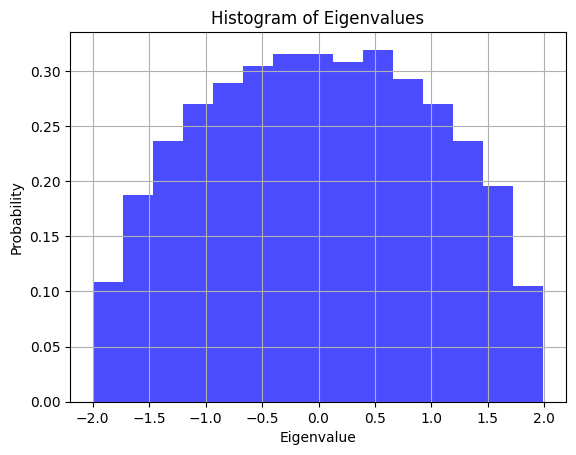

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# 行列の固有値を計算
eigenvalues = np.linalg.eigvals(symmetric_matrix)
eigenvalues1 =eigenvalues/np.sqrt(1000)

# 固有値のヒストグラムを作成
plt.hist(eigenvalues1, bins=15, density=True, alpha=0.7, color='blue')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability')
plt.title('Histogram of Eigenvalues')
plt.grid(True)
plt.show()


### Wignerの半円則

$$
p(\lambda) = \frac{1}{2 \pi \sigma^2}\sqrt{4\sigma^2-\lambda^2},  
$$
Gauss型ランダム行列の場合は$\sigma^2=1$になる。

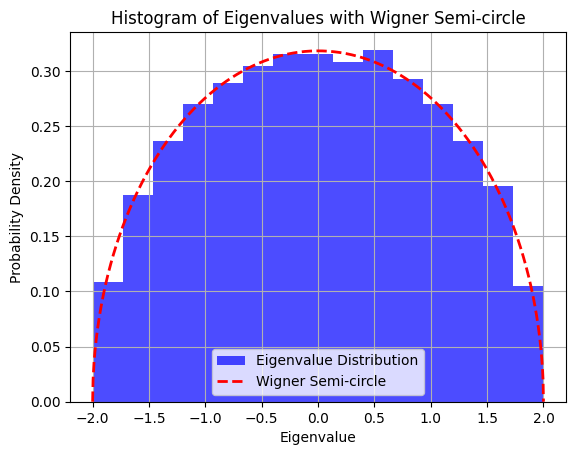

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# 行列の固有値を計算
eigenvalues = np.linalg.eigvals(symmetric_matrix)
eigenvalues1 = eigenvalues / np.sqrt(1000)

# 固有値のヒストグラムを作成
plt.hist(eigenvalues1, bins=15, density=True, alpha=0.7, color='blue', label='Eigenvalue Distribution')

# Wignerの半円分布をプロット
x = np.linspace(-2, 2, 1000)
wigner = np.sqrt(4 - x**2) / (2 * np.pi)
plt.plot(x, wigner, color='red', linestyle='--', linewidth=2, label='Wigner Semi-circle')

plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Histogram of Eigenvalues with Wigner Semi-circle')
plt.legend()
plt.grid(True)
plt.show()


固有ベクトルの分布を図示すると

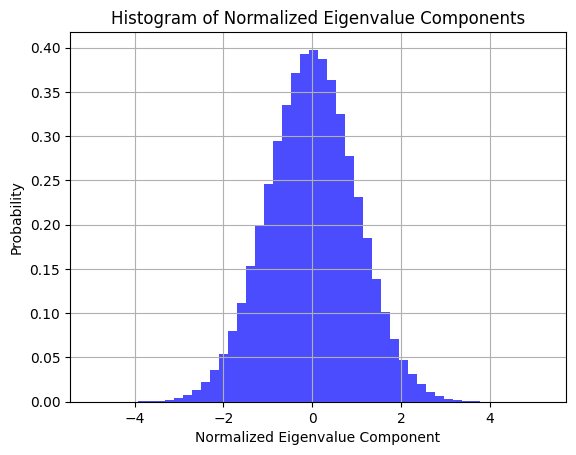

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 行列の固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eig(symmetric_matrix)

# 固有ベクトルの成分を取得
eigenvector_components = eigenvectors.real  # 実部のみを取得

# 固有ベクトルの成分を規格化
eigenvector_norms = np.sum(eigenvector_components**2, axis=1)**0.5  # 各固有ベクトルのノルムを計算
normalized_eigenvectors = eigenvector_components / eigenvector_norms[:, np.newaxis]  # 規格化

# ユーザー定義の規格化条件を適用
normalized_eigenvectors *= np.sqrt(1000)

# 規格化された固有ベクトルの成分のヒストグラムを作成
plt.hist(normalized_eigenvectors.flatten(), bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Normalized Eigenvalue Component')
plt.ylabel('Probability')
plt.title('Histogram of Normalized Eigenvalue Components')
plt.grid(True)
plt.show()


### Porter-Thomas分布

$$
P(u_{i,j})=\frac{1}{\sqrt{2\pi}}\exp(-\frac{u^2_{i,j}}{2})
$$
Gauss分布と同じになる

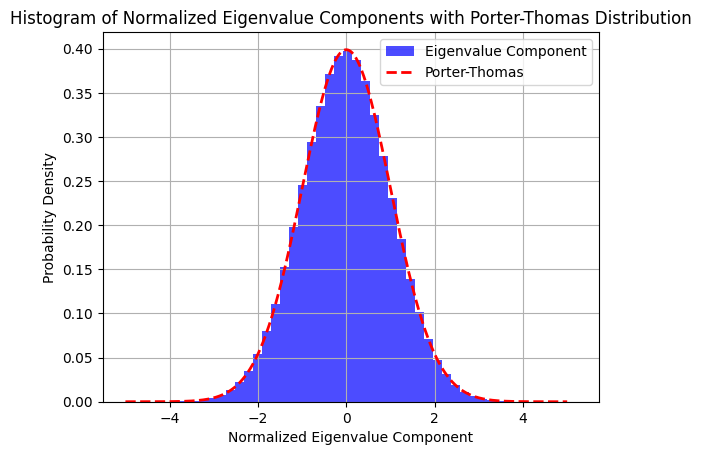

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 行列の固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eig(symmetric_matrix)

# 固有ベクトルの成分を取得
eigenvector_components = eigenvectors.real  # 実部のみを取得

# 固有ベクトルの成分を規格化
eigenvector_norms = np.sum(eigenvector_components**2, axis=1)**0.5  # 各固有ベクトルのノルムを計算
normalized_eigenvectors = eigenvector_components / eigenvector_norms[:, np.newaxis]  # 規格化

# ユーザー定義の規格化条件を適用
normalized_eigenvectors *= np.sqrt(1000)

# 規格化された固有ベクトルの成分のヒストグラムを作成
plt.hist(normalized_eigenvectors.flatten(), bins=50, density=True, alpha=0.7, color='blue', label='Eigenvalue Component')

# Porter-Thomas分布の定義
def porter_thomas(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x**2)

x = np.linspace(-5, 5, 1000)
y = porter_thomas(x)

# Porter-Thomas分布をプロット
plt.plot(x, y, color='red', linestyle='--', linewidth=2, label='Porter-Thomas')

plt.xlabel('Normalized Eigenvalue Component')
plt.ylabel('Probability Density')
plt.title('Histogram of Normalized Eigenvalue Components with Porter-Thomas Distribution')
plt.legend()
plt.grid(True)
plt.show()


## 一様ランダム行列の場合

In [6]:
import numpy as np

# 1000×1000の一様乱数行列を生成
matrix1 = np.random.uniform(low=-0.5, high=0.5, size=(1000, 1000))

# 上半分の三角行列を生成
upper_triangular = np.triu(matrix1, k=0)

# 対称行列を作成
symmetric_matrix1 = upper_triangular + upper_triangular.T

# 対角成分に元の乱数行列の値を使う
np.fill_diagonal(symmetric_matrix1, np.diag(matrix1))

# 生成した対称行列を出力
print("Symmetric matrix:")
print(symmetric_matrix1)


Symmetric matrix:
[[ 0.08210866  0.13083193 -0.22827456 ... -0.14435275  0.05210611
   0.03895123]
 [ 0.13083193  0.33015418  0.44147788 ...  0.17583143  0.46782422
   0.12555362]
 [-0.22827456  0.44147788  0.10501404 ...  0.26950401 -0.22971486
   0.48761338]
 ...
 [-0.14435275  0.17583143  0.26950401 ... -0.40996779 -0.41421221
  -0.26700037]
 [ 0.05210611  0.46782422 -0.22971486 ... -0.41421221 -0.14713924
   0.12717612]
 [ 0.03895123  0.12555362  0.48761338 ... -0.26700037  0.12717612
  -0.42613818]]


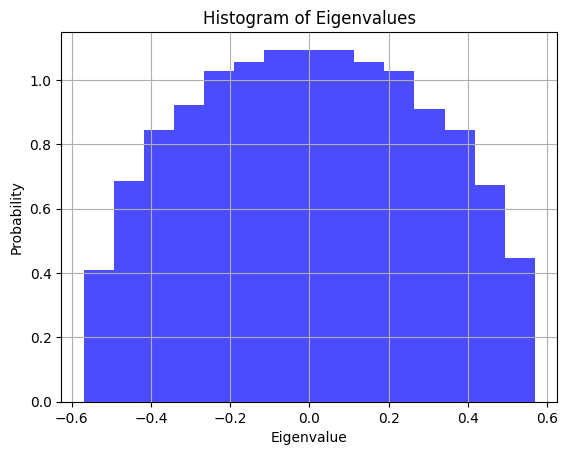

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 行列の固有値を計算
eigenvalues = np.linalg.eigvals(symmetric_matrix1)
eigenvalues1 = eigenvalues/np.sqrt(1000)

# 固有値のヒストグラムを作成
plt.hist(eigenvalues1, bins=15, density=True, alpha=0.7, color='blue')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability')
plt.title('Histogram of Eigenvalues')
plt.grid(True)
plt.show()


<ipython-input-58-e63c80ab61b5>:5: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(4*(1/12)- x**2) / (2 * np.pi*(1/12))


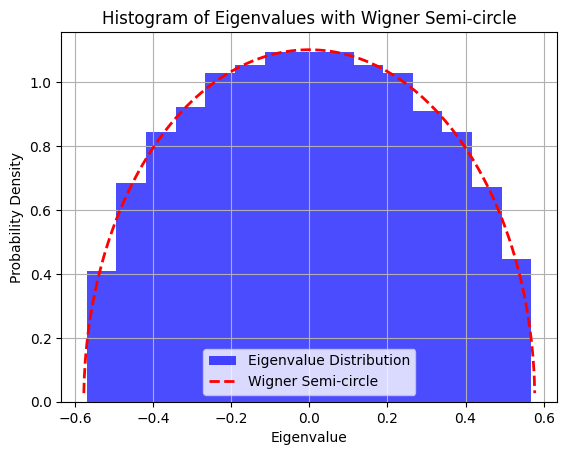

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def wigner_semicircle(x):
    return np.sqrt(4*(1/12)- x**2) / (2 * np.pi*(1/12))

# 行列の固有値を計算
eigenvalues = np.linalg.eigvals(symmetric_matrix1)
eigenvalues1 = eigenvalues / np.sqrt(1000)

# 固有値のヒストグラムを作成
plt.hist(eigenvalues1, bins=15, density=True, alpha=0.7, color='blue', label='Eigenvalue Distribution')

# Wignerの半円をプロット
x_wigner = np.linspace(-0.6, 0.6, 1000)
y_wigner = wigner_semicircle(x_wigner)
plt.plot(x_wigner, y_wigner, color='red', linestyle='--', linewidth=2, label='Wigner Semi-circle')

plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Histogram of Eigenvalues with Wigner Semi-circle')
plt.legend()
plt.grid(True)
plt.show()


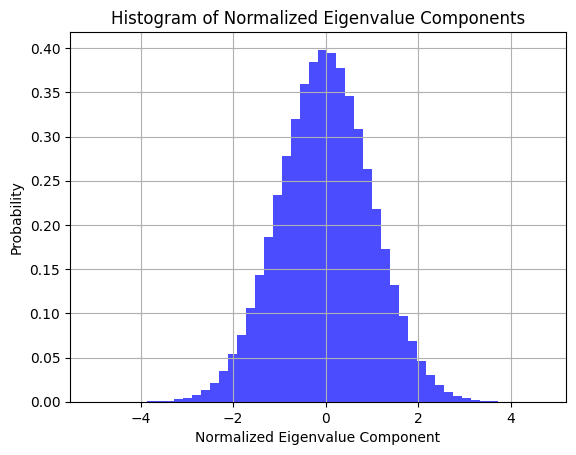

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 行列の固有値と固有ベクトルを計算
eigenvalues, eigenvectors = np.linalg.eig(symmetric_matrix1)

# 固有ベクトルの成分を取得
eigenvector_components = eigenvectors.real  # 実部のみを取得

# 固有ベクトルの成分を規格化
eigenvector_norms = np.sum(eigenvector_components**2, axis=1)**0.5  # 各固有ベクトルのノルムを計算
normalized_eigenvectors = eigenvector_components / eigenvector_norms[:, np.newaxis]  # 規格化

# ユーザー定義の規格化条件を適用
normalized_eigenvectors *= np.sqrt(1000)

# 規格化された固有ベクトルの成分のヒストグラムを作成
plt.hist(normalized_eigenvectors.flatten(), bins=50, density=True, alpha=0.7, color='blue')
plt.xlabel('Normalized Eigenvalue Component')
plt.ylabel('Probability')
plt.title('Histogram of Normalized Eigenvalue Components')
plt.grid(True)
plt.show()


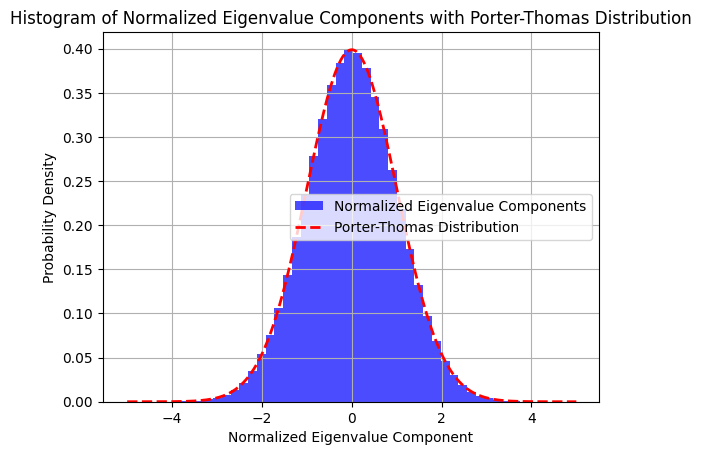

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Porter-Thomas分布の定義
def porter_thomas(x):
    return 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * x**2)

# ユーザー定義の規格化条件を適用した規格化された固有ベクトルの成分のヒストグラムを作成
plt.hist(normalized_eigenvectors.flatten(), bins=50, density=True, alpha=0.7, color='blue', label='Normalized Eigenvalue Components')

# Porter-Thomas分布をプロット
x = np.linspace(-5, 5, 1000)
y = porter_thomas(x)
plt.plot(x, y, color='red', linestyle='--', linewidth=2, label='Porter-Thomas Distribution')

plt.xlabel('Normalized Eigenvalue Component')
plt.ylabel('Probability Density')
plt.title('Histogram of Normalized Eigenvalue Components with Porter-Thomas Distribution')
plt.legend()
plt.grid(True)
plt.show()


Wignerの半円則の導出をする。

レゾルベントの定義
$$
R(z)=(z1-H)^{-1}
$$

H:行列、z:複素数、
レゾルベントは逆行列を取ること行列の固有値と固有ベクトルを見つけるためのツールですが、固有ベクトルは行列の特定の固有値に対応するベクトルのことを指します。

# カイラルランダム行列の固有値分布

In [11]:
import numpy as np

# 大きさ (1000×2000) の標準正規分布に従う行列を生成
matrix = np.random.randn(1000, 2000)

# 行列の転置を取得
matrix_transpose = np.transpose(matrix)

# 行列とその転置の積を計算
product_matrix = np.dot(matrix, matrix_transpose)

# 結果の行列を出力
print(product_matrix)


[[2048.11492098   25.36182447  -21.68863364 ...   46.2461333
     6.56030802  106.36129303]
 [  25.36182447 1880.42888943   11.06446265 ...  -22.16398245
   -29.38913056   17.92429069]
 [ -21.68863364   11.06446265 2047.3284056  ...   62.7688905
     6.36386389   27.38161989]
 ...
 [  46.2461333   -22.16398245   62.7688905  ... 1974.49476373
   -33.62388001   20.9180829 ]
 [   6.56030802  -29.38913056    6.36386389 ...  -33.62388001
  2127.34972917  -13.85061151]
 [ 106.36129303   17.92429069   27.38161989 ...   20.9180829
   -13.85061151 1991.19254144]]


In [12]:
import numpy as np

# 大きさ (1000×2000) の平均0、分散が1/2000の正規分布に従う行列を生成
matrix = np.random.normal(loc=0, scale=np.sqrt(1/2000), size=(1000, 2000))

# 行列の転置を取得
matrix_transpose = np.transpose(matrix)

# 行列とその転置の積を計算
product_matrix = np.dot(matrix, matrix_transpose)

# 結果の行列を出力
print(product_matrix)


[[ 9.78497521e-01 -6.34605271e-03  2.29864867e-02 ...  2.09410461e-02
   1.33950486e-02  9.75543909e-04]
 [-6.34605271e-03  9.92152324e-01  1.86054591e-02 ...  2.71008329e-02
  -1.19281031e-02 -1.34271921e-02]
 [ 2.29864867e-02  1.86054591e-02  9.51430109e-01 ...  2.23343892e-02
   2.17454469e-02 -2.89020934e-03]
 ...
 [ 2.09410461e-02  2.71008329e-02  2.23343892e-02 ...  1.01271053e+00
  -1.52489434e-02 -1.34282919e-03]
 [ 1.33950486e-02 -1.19281031e-02  2.17454469e-02 ... -1.52489434e-02
   1.04442064e+00  1.24930177e-02]
 [ 9.75543909e-04 -1.34271921e-02 -2.89020934e-03 ... -1.34282919e-03
   1.24930177e-02  9.64974058e-01]]


固有値分布を図示すると

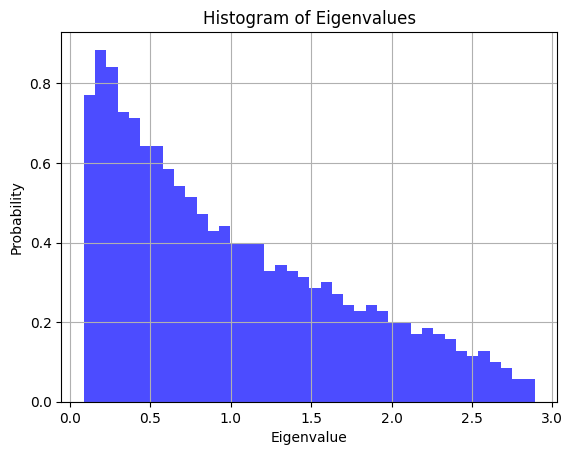

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# 行列の固有値を計算
eigenvalues = np.linalg.eigvals(product_matrix)

# 固有値のヒストグラムを作成
plt.hist(eigenvalues, bins=40, density=True, alpha=0.7, color='blue')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability')
plt.title('Histogram of Eigenvalues')
plt.grid(True)
plt.show()


## Marcenko-Pasturの定理
$$
 p(\lambda) = \frac{Q}{2\pi\sigma^2}\frac{\sqrt{(\lambda_+ - \lambda)(\lambda - \lambda_-)}}{\lambda}
$$
ここで、$\sigma^2$は確率変数の分散、Q=T/N
$$
\lambda_+=\sigma^2(1+\frac{1}{Q}+2\sqrt{\frac{1}{Q}}),
\lambda_+=\sigma^2(1+\frac{1}{Q}-2\sqrt{\frac{1}{Q}})
$$

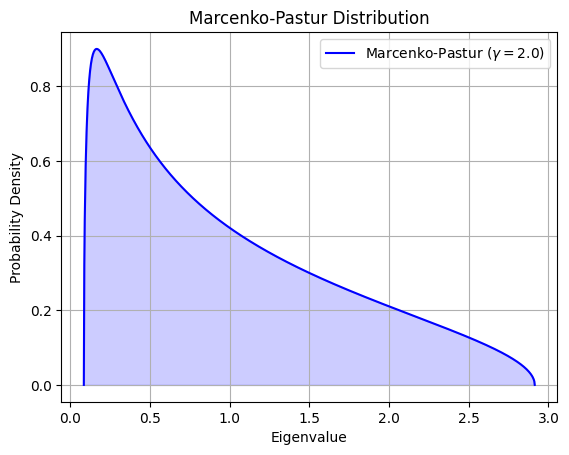

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def marcenko_pastur(x, gamma):
    l_min = (1 - np.sqrt(1/(gamma)))**2
    l_max = (1 + np.sqrt(1/(gamma)))**2
    return gamma * np.sqrt((l_max - x) * (x - l_min)) / (2 * np.pi * variance * x)

# パラメータ設定
gamma = 2000/1000
variance = 1

# 分布の範囲
x_min = (1 - np.sqrt(1/(gamma)))**2
x_max = (1 + np.sqrt(1/(gamma)))**2

# 等高線を描画するためのデータ点生成
x_values = np.linspace(x_min, x_max, 1000)
y_values = marcenko_pastur(x_values, gamma)

# プロット
plt.plot(x_values, y_values, color='blue', label=f'Marcenko-Pastur ($\gamma={gamma}$)')
plt.fill_between(x_values, y_values, color='blue', alpha=0.2)
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Marcenko-Pastur Distribution')
plt.legend()
plt.grid(True)
plt.show()


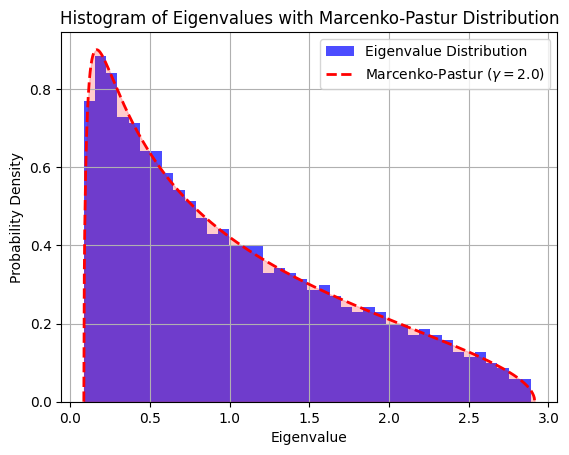

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def marcenko_pastur(x, gamma, variance):
    l_min = (1 - np.sqrt(1/gamma))**2
    l_max = (1 + np.sqrt(1/gamma))**2
    return gamma * np.sqrt((l_max - x) * (x - l_min)) / (2 * np.pi * variance * x)

# 行列の固有値を計算
eigenvalues = np.linalg.eigvals(product_matrix)

# パラメータ設定
gamma = 2000 / 1000
variance = 1

# 分布の範囲
x_min = (1 - np.sqrt(1 / gamma))**2
x_max = (1 + np.sqrt(1 / gamma))**2

# 等高線を描画するためのデータ点生成
x_values = np.linspace(x_min, x_max, 1000)
y_values = marcenko_pastur(x_values, gamma, variance)

# 固有値のヒストグラムを作成
plt.hist(eigenvalues, bins=40, density=True, alpha=0.7, color='blue', label='Eigenvalue Distribution')

# Marcenko-Pastur分布をプロット
plt.plot(x_values, y_values, color='red', linestyle='--', linewidth=2, label=f'Marcenko-Pastur ($\gamma={gamma}$)')
plt.fill_between(x_values, y_values, color='red', alpha=0.2)

plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Histogram of Eigenvalues with Marcenko-Pastur Distribution')
plt.legend()
plt.grid(True)
plt.show()


# 相関行列（593銘柄、470日）

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/471-600.csv",index_col=0)
print(df)

              7203     6758    8306     6861     8035     6501   9432    8316  \
Date                                                                            
2022-02-01  2227.0  12770.0   698.6  59410.0  18456.7   5802.0  132.0  4154.0   
2022-02-02  2273.5  13400.0   719.0  63080.0  18833.3   6051.0  131.3  4232.0   
2022-02-03  2293.5  12585.0   719.3  60060.0  18400.0   5852.0  133.5  4174.0   
2022-02-04  2277.5  12600.0   725.7  59990.0  18680.0   5910.0  134.5  4216.0   
2022-02-07  2275.5  12660.0   740.3  58760.0  18423.3   5888.0  134.0  4336.0   
...            ...      ...     ...      ...      ...      ...    ...     ...   
2023-12-25  2537.0  13120.0  1207.0  62040.0  25025.0  10070.0  171.3  6794.0   
2023-12-26  2541.0  13150.0  1203.5  62240.0  25300.0  10035.0  170.8  6774.0   
2023-12-27  2583.0  13340.0  1209.5  62830.0  25620.0  10200.0  171.6  6847.0   
2023-12-28  2556.0  13375.0  1203.5  62630.0  25465.0  10170.0  171.9  6828.0   
2023-12-29  2590.5  13410.0 

欠損値の除去と対数収益率の計算

In [18]:
import pandas as pd
import numpy as np

# データフレーム df が既に与えられているとします

# 株価終値の対数収益率を計算する関数
def calculate_log_returns(df):
    # 欠損値を含む列を削除します
    df = df.dropna(axis=1)

    # 日次の対数収益率を計算します
    log_returns = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    return log_returns

# 対数収益率の計算
log_returns = calculate_log_returns(df)

# 最初のNaNを含む行を削除します
log_returns = log_returns.dropna()


# 結果の表示
print(log_returns)


                7203      6758      8306      6861      8035      6501  \
Date                                                                     
2022-02-02  0.020665  0.048156  0.028783  0.059941  0.020199  0.042021   
2022-02-03  0.008759 -0.062749  0.000417 -0.049060 -0.023276 -0.033440   
2022-02-04 -0.007001  0.001191  0.008858 -0.001166  0.015103  0.009862   
2022-02-07 -0.000879  0.004751  0.019919 -0.020717 -0.013837 -0.003729   
2022-02-08  0.008969 -0.010721  0.015149 -0.005119  0.003976  0.010979   
...              ...       ...       ...       ...       ...       ...   
2023-12-25  0.008312  0.010343 -0.007429  0.000322  0.004807  0.006976   
2023-12-26  0.001575  0.002284 -0.002904  0.003219  0.010929 -0.003482   
2023-12-27  0.016394  0.014345  0.004973  0.009435  0.012569  0.016309   
2023-12-28 -0.010508  0.002620 -0.004973 -0.003188 -0.006068 -0.002946   
2023-12-29  0.013407  0.002613  0.006625 -0.008176 -0.008281  0.000000   

                9432      8316      8

In [19]:
# 基本統計量を計算
summary_statistics = log_returns.describe()
print(summary_statistics)

             7203        6758        8306        6861        8035        6501  \
count  470.000000  470.000000  470.000000  470.000000  470.000000  470.000000   
mean     0.000322    0.000104    0.001171    0.000095    0.000667    0.001194   
std      0.016859    0.017881    0.017151    0.019116    0.023532    0.017473   
min     -0.067583   -0.062749   -0.089772   -0.060438   -0.086099   -0.071480   
25%     -0.008384   -0.010932   -0.009465   -0.010884   -0.013746   -0.008436   
50%      0.000000   -0.000602    0.001019    0.000170    0.000986    0.000542   
75%      0.009399    0.010149    0.010329    0.010772    0.016977    0.010768   
max      0.060909    0.077367    0.058108    0.085399    0.080945    0.065328   

             9432        8316        8058        4063  ...        7148  \
count  470.000000  470.000000  470.000000  470.000000  ...  470.000000   
mean     0.000567    0.001074    0.001195    0.000930  ...    0.001704   
std      0.010584    0.015511    0.017769    0.0

## 対数収益率の標準化

In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# データフレーム df が既に与えられているとします

# 株価終値の対数収益率を計算する関数
def calculate_log_returns(df):
    # 欠損値を含む列を削除します
    df = df.dropna(axis=1)

    # 日次の対数収益率を計算します
    log_returns = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    return log_returns

# 対数収益率の計算
log_returns = calculate_log_returns(df)

# 最初のNaNを含む行を削除します
log_returns = log_returns.dropna()


# 対数収益率の標準化
scaler = StandardScaler()
log_returns_standardized = pd.DataFrame(scaler.fit_transform(log_returns), index=log_returns.index, columns=log_returns.columns)

# 結果の表示
print(log_returns_standardized)


                7203      6758      8306      6861      8035      6501  \
Date                                                                     
2022-02-02  1.207957  2.690159  1.611650  3.134001  0.830892  2.339047   
2022-02-03  0.500965 -3.518791 -0.044021 -2.574104 -1.018547 -1.984264   
2022-02-04 -0.434790  0.060863  0.448669 -0.066040  0.614091  0.496620   
2022-02-07 -0.071268  0.260134  1.094259 -1.089843 -0.617024 -0.282082   
2022-02-08  0.513443 -0.606020  0.815839 -0.273018  0.140763  0.560590   
...              ...       ...       ...       ...       ...       ...   
2023-12-25  0.474447  0.573218 -0.501980  0.011915  0.176096  0.331233   
2023-12-26  0.074444  0.122042 -0.237870  0.163577  0.436541 -0.267889   
2023-12-27  0.954334  0.797286  0.221900  0.489106  0.506300  0.865947   
2023-12-28 -0.643047  0.140868 -0.358641 -0.171932 -0.286532 -0.237168   
2023-12-29  0.777005  0.140485  0.318337 -0.433147 -0.380651 -0.068414   

                9432      8316      8

## 対数収益率の相関行列の計算

In [21]:
# 標準化された対数収益率の相関行列の計算
correlation_matrix = log_returns_standardized.corr()

# 結果の表示
print(correlation_matrix)

          7203      6758      8306      6861      8035      6501      9432  \
7203  1.000000  0.502415  0.436809  0.406414  0.390012  0.558259  0.343538   
6758  0.502415  1.000000  0.245838  0.622238  0.579482  0.558956  0.208052   
8306  0.436809  0.245838  1.000000  0.122005  0.174890  0.365982  0.315462   
6861  0.406414  0.622238  0.122005  1.000000  0.562649  0.523746  0.178937   
8035  0.390012  0.579482  0.174890  0.562649  1.000000  0.472394  0.083921   
...        ...       ...       ...       ...       ...       ...       ...   
2121  0.299905  0.355828  0.172317  0.280957  0.259969  0.336707  0.206174   
7817  0.365431  0.367263  0.243724  0.333626  0.180636  0.352234  0.327274   
9757  0.400012  0.451747  0.228429  0.468126  0.348850  0.363768  0.224171   
2270  0.179623  0.101862  0.114318  0.110236  0.035237  0.138409  0.373487   
5703  0.498124  0.374635  0.420308  0.296115  0.359954  0.489529  0.265334   

          8316      8058      4063  ...      7148      8511    

## 相関行列の成分の確率密度

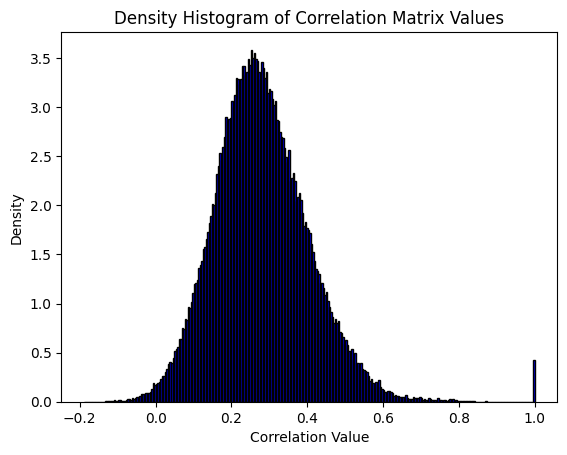

In [22]:
import matplotlib.pyplot as plt

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix.values.flatten()

# ヒストグラムのプロット
plt.hist(correlation_values, bins=300, color='blue', edgecolor='black', density=True)

# グラフの装飾
plt.title('Density Histogram of Correlation Matrix Values')
plt.xlabel('Correlation Value')
plt.ylabel('Density')

# グラフの表示
plt.show()


## 相関行列成分の平均、分散、歪度、尖度の計算

In [23]:
import numpy as np
from scipy.stats import skew, kurtosis

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix.values.flatten()

# 平均の計算
mean_corr = np.mean(correlation_values)

# 分散の計算
var_corr = np.var(correlation_values)

# 歪度の計算
skewness_corr = skew(correlation_values)

# 尖度の計算
kurtosis_corr = kurtosis(correlation_values)

# 結果の表示
print("Mean of correlation values:", mean_corr)
print("Variance of correlation values:", var_corr)
print("Skewness of correlation values:", skewness_corr)
print("Kurtosis of correlation values:", kurtosis_corr)


Mean of correlation values: 0.27899918672667584
Variance of correlation values: 0.015573416359153833
Skewness of correlation values: 0.6277630128229043
Kurtosis of correlation values: 1.9200635193056454


平均=0.279、分散=0.016、歪度=0.628(正規分布だと0)、尖度=1.92(正規分布だと0)になった。

## カイラルGauss型ランダム行列の成分の確率密度

In [24]:
import numpy as np

# 大きさ (593×470) の標準正規分布に従う行列を生成
matrix = np.random.randn(470, 593)

# 相関行列の計算
correlation_matrix_r = np.corrcoef(matrix, rowvar=False)

# 結果の表示
print(correlation_matrix_r)

# 結果の行列を出力
print("行数:", correlation_matrix_r.shape[0])
print("列数:", correlation_matrix_r.shape[1])

[[ 1.         -0.00567937  0.00108424 ... -0.04488997  0.03994162
   0.06029966]
 [-0.00567937  1.          0.04436574 ... -0.02442811 -0.11229536
  -0.07400025]
 [ 0.00108424  0.04436574  1.         ... -0.01966437  0.02845155
  -0.06707756]
 ...
 [-0.04488997 -0.02442811 -0.01966437 ...  1.          0.12049564
  -0.00960122]
 [ 0.03994162 -0.11229536  0.02845155 ...  0.12049564  1.
  -0.00497029]
 [ 0.06029966 -0.07400025 -0.06707756 ... -0.00960122 -0.00497029
   1.        ]]
行数: 593
列数: 593


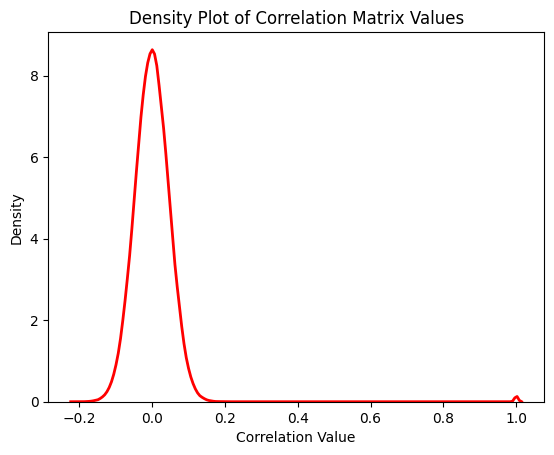

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 相関行列の成分を1次元の配列にフラット化
correlation_values_r = correlation_matrix_r.flatten()

# カーネル密度推定を使用して密度関数を推定し、実線で図示
sns.kdeplot(correlation_values_r, color='red', linewidth=2)

# グラフの装飾
plt.title('Density Plot of Correlation Matrix Values')
plt.xlabel('Correlation Value')
plt.ylabel('Density')

# グラフの表示
plt.show()


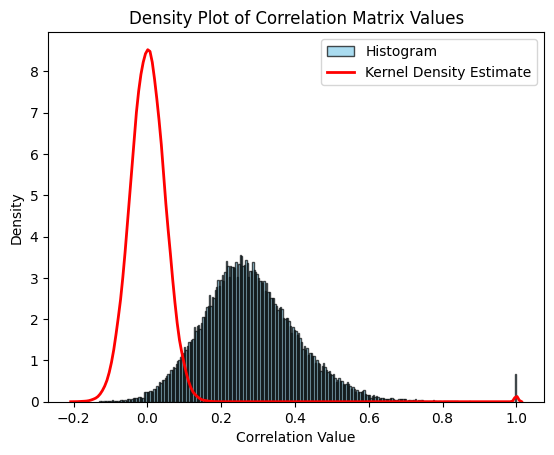

In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# データフレーム df が既に与えられているとします

# 株価終値の対数収益率を計算する関数
def calculate_log_returns(df):
    # 欠損値を含む列を削除します
    df = df.dropna(axis=1)

    # 日次の対数収益率を計算します
    log_returns = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    return log_returns

# 対数収益率の計算
log_returns = calculate_log_returns(df)

# 最初のNaNを含む行を削除します
log_returns = log_returns.dropna()

# 対数収益率の標準化
scaler = StandardScaler()
log_returns_standardized = pd.DataFrame(scaler.fit_transform(log_returns), index=log_returns.index, columns=log_returns.columns)

# 標準化された対数収益率の相関行列の計算
correlation_matrix = log_returns_standardized.corr()

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix.values.flatten()

# ヒストグラムのプロット
plt.hist(correlation_values, bins=300, color='skyblue', edgecolor='black', density=True, alpha=0.7, label='Histogram')

# 大きさ (470×593) の標準正規分布に従う行列を生成
matrix = np.random.randn(470, 593)

# 相関行列の計算
correlation_matrix_r = np.corrcoef(matrix, rowvar=False)

# 相関行列の成分を1次元の配列にフラット化
correlation_values_r = correlation_matrix_r.flatten()

# カーネル密度推定を使用して密度関数を推定し、実線で図示
sns.kdeplot(correlation_values_r, color='red', linewidth=2, label='Kernel Density Estimate')

# グラフの装飾
plt.title('Density Plot of Correlation Matrix Values')
plt.xlabel('Correlation Value')
plt.ylabel('Density')
plt.legend()

# グラフの表示
plt.show()


## 相関行列の固有値の確率密度

In [37]:
import numpy as np
from scipy.linalg import eigh

# 対称行列の固有値を計算
eigenvalues, eigenvectors = eigh(correlation_matrix)
print(correlation_matrix)

# 固有値の表示
print("Eigenvalues:", eigenvalues)


          7203      6758      8306      6861      8035      6501      9432  \
7203  1.000000  0.502415  0.436809  0.406414  0.390012  0.558259  0.343538   
6758  0.502415  1.000000  0.245838  0.622238  0.579482  0.558956  0.208052   
8306  0.436809  0.245838  1.000000  0.122005  0.174890  0.365982  0.315462   
6861  0.406414  0.622238  0.122005  1.000000  0.562649  0.523746  0.178937   
8035  0.390012  0.579482  0.174890  0.562649  1.000000  0.472394  0.083921   
...        ...       ...       ...       ...       ...       ...       ...   
2810  0.271418  0.182946  0.180889  0.186858  0.055109  0.217467  0.379541   
5344  0.392696  0.502704  0.217012  0.532491  0.559701  0.540087  0.085833   
4631  0.510913  0.444660  0.310465  0.374103  0.340868  0.505921  0.273292   
9744  0.375142  0.472721  0.234008  0.498784  0.400484  0.484016  0.297152   
4980  0.409317  0.468838  0.126797  0.480117  0.517016  0.382495  0.077977   

          8316      8058      4063  ...      5991      9301    

In [49]:
import numpy as np

# 固有値を小さい順に並び替える
sorted_eigenvalues = np.sort(eigenvalues)

# 結果の表示
print("Sorted Eigenvalues:", sorted_eigenvalues)


Sorted Eigenvalues: [1.96962040e-03 2.75929376e-03 3.06515545e-03 3.28905208e-03
 3.40779562e-03 3.93960846e-03 4.08871242e-03 4.44112208e-03
 4.96816703e-03 5.29742735e-03 5.70669330e-03 6.44641503e-03
 6.84589044e-03 7.01559472e-03 7.22382019e-03 7.62490443e-03
 8.13912373e-03 8.56275372e-03 8.94412481e-03 9.30708662e-03
 9.61380906e-03 9.84983160e-03 1.01073611e-02 1.03662842e-02
 1.12311983e-02 1.16869716e-02 1.19105188e-02 1.22132975e-02
 1.23708007e-02 1.33405641e-02 1.39369423e-02 1.44991982e-02
 1.49038240e-02 1.52110012e-02 1.57070706e-02 1.57951887e-02
 1.62930958e-02 1.71208682e-02 1.77335918e-02 1.80045196e-02
 1.92600390e-02 1.96211927e-02 2.00019962e-02 2.04019148e-02
 2.12831544e-02 2.18615987e-02 2.26254648e-02 2.29794943e-02
 2.40630599e-02 2.45140278e-02 2.52645569e-02 2.57509303e-02
 2.66913558e-02 2.75159114e-02 2.82796540e-02 2.84718691e-02
 3.00546297e-02 3.12448162e-02 3.16786403e-02 3.26499141e-02
 3.28183246e-02 3.37469493e-02 3.41225928e-02 3.50043245e-02
 3.5

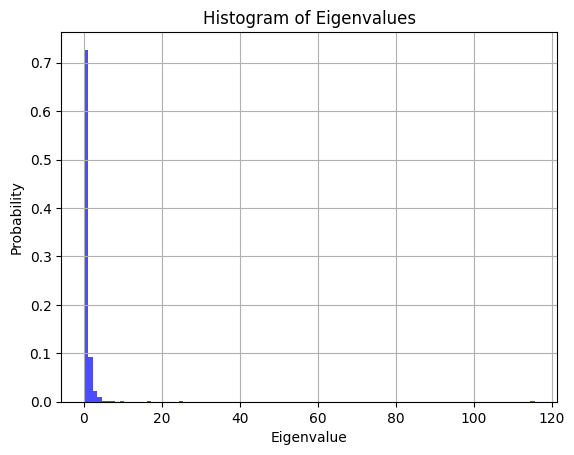

In [45]:
import numpy as np
import matplotlib.pyplot as plt


# 固有値のヒストグラムを作成
plt.hist(eigenvalues, bins=100, density=True, alpha=0.7, color='blue')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability')
plt.title('Histogram of Eigenvalues')
plt.grid(True)
plt.show()


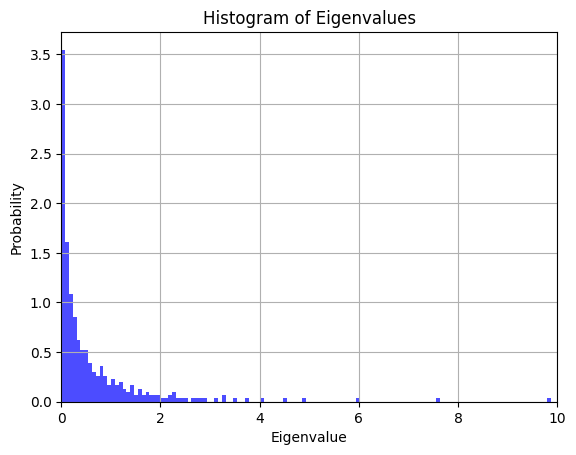

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# 固有値のヒストグラムを作成
plt.hist(eigenvalues, bins=1500, density=True, alpha=0.7, color='blue')
plt.xlabel('Eigenvalue')
plt.ylabel('Probability')
plt.title('Histogram of Eigenvalues')
plt.grid(True)

# x軸の範囲を0から10に拡大
plt.xlim(0, 10)

# グラフの表示
plt.show()


0.7925801011804384
0.015191831525079151
4.5082124237940695


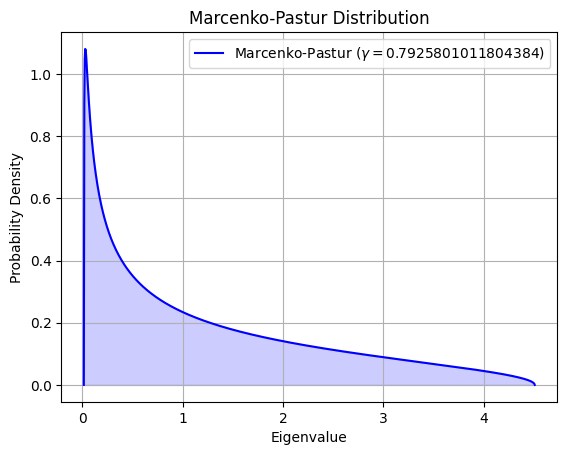

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def marcenko_pastur(x, gamma):
    l_min = (1 - np.sqrt(1/(gamma)))**2
    l_max = (1 + np.sqrt(1/(gamma)))**2
    return gamma * np.sqrt((l_max - x) * (x - l_min)) / (2 * np.pi * variance * x)

# パラメータ設定
gamma = 470/593
variance = 1

# 分布の範囲
x_min = (1 - np.sqrt(1/(gamma)))**2
x_max = (1 + np.sqrt(1/(gamma)))**2

print(gamma)
print(x_min)
print(x_max)

# 等高線を描画するためのデータ点生成
x_values = np.linspace(x_min, x_max, 1000)
y_values = marcenko_pastur(x_values, gamma)

# プロット
plt.plot(x_values, y_values, color='blue', label=f'Marcenko-Pastur ($\gamma={gamma}$)')
plt.fill_between(x_values, y_values, color='blue', alpha=0.2)
plt.xlabel('Eigenvalue')
plt.ylabel('Probability Density')
plt.title('Marcenko-Pastur Distribution')
plt.legend()
plt.grid(True)
plt.show()


In [51]:
import numpy as np

# 固有値を小さい順に並び替えた場合のインデックスを取得
sorted_indices = np.argsort(eigenvalues)

# 固有値が指定された値よりも大きい個数を数える
threshold_value = 4.5082124237940695
count_greater_than_threshold = np.sum(eigenvalues > threshold_value)

# 指定された値よりも大きい固有値とその個数を表示
print("Number of eigenvalues greater than", threshold_value, ":", count_greater_than_threshold)
print("Eigenvalues greater than", threshold_value, ":", eigenvalues[eigenvalues > threshold_value])


Number of eigenvalues greater than 4.5082124237940695 : 8
Eigenvalues greater than 4.5082124237940695 : [  4.53310101   4.88016289   5.97286887   7.60698669   9.81200473
  17.14637143  25.26100507 115.67037401]


In [52]:
import numpy as np

# 固有値を小さい順に並び替えた場合のインデックスを取得
sorted_indices = np.argsort(eigenvalues)

# 固有値が指定された値よりも小さい個数を数える
threshold_value = 0.015191831525079151
count_less_than_threshold = np.sum(eigenvalues < threshold_value)

# 指定された値よりも小さい固有値とその個数を表示
print("Number of eigenvalues less than", threshold_value, ":", count_less_than_threshold)
print("Eigenvalues less than", threshold_value, ":", eigenvalues[eigenvalues < threshold_value])


Number of eigenvalues less than 0.015191831525079151 : 33
Eigenvalues less than 0.015191831525079151 : [0.00196962 0.00275929 0.00306516 0.00328905 0.0034078  0.00393961
 0.00408871 0.00444112 0.00496817 0.00529743 0.00570669 0.00644642
 0.00684589 0.00701559 0.00722382 0.0076249  0.00813912 0.00856275
 0.00894412 0.00930709 0.00961381 0.00984983 0.01010736 0.01036628
 0.0112312  0.01168697 0.01191052 0.0122133  0.0123708  0.01334056
 0.01393694 0.0144992  0.01490382]


T=470の場合、Q=0.792、
$\lambda_+$=4.508、$\lambda_-$=0.015

$\lambda_1$=115.67、$\lambda_{593}$=0.00196

具体的に$\lambda_r$との大小関係をかくと、
$$
\lambda_{593}<…<\lambda_{561}<\lambda_-<…<\lambda_+<\lambda_8<…<\lambda_1
$$

であり、$\lambda_+$より大きい固有値の数は8個、$\lambda_-$より小さい固有値の数は33個である。

# 相関行列（471銘柄、470日）

In [29]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/471-400.csv",index_col=0)
print(df)

              7203     6758    8306     6861     8035     6501   9432    8316  \
Date                                                                            
2022-02-01  2227.0  12770.0   698.6  59410.0  18456.7   5802.0  132.0  4154.0   
2022-02-02  2273.5  13400.0   719.0  63080.0  18833.3   6051.0  131.3  4232.0   
2022-02-03  2293.5  12585.0   719.3  60060.0  18400.0   5852.0  133.5  4174.0   
2022-02-04  2277.5  12600.0   725.7  59990.0  18680.0   5910.0  134.5  4216.0   
2022-02-07  2275.5  12660.0   740.3  58760.0  18423.3   5888.0  134.0  4336.0   
...            ...      ...     ...      ...      ...      ...    ...     ...   
2023-12-25  2537.0  13120.0  1207.0  62040.0  25025.0  10070.0  171.3  6794.0   
2023-12-26  2541.0  13150.0  1203.5  62240.0  25300.0  10035.0  170.8  6774.0   
2023-12-27  2583.0  13340.0  1209.5  62830.0  25620.0  10200.0  171.6  6847.0   
2023-12-28  2556.0  13375.0  1203.5  62630.0  25465.0  10170.0  171.9  6828.0   
2023-12-29  2590.5  13410.0 

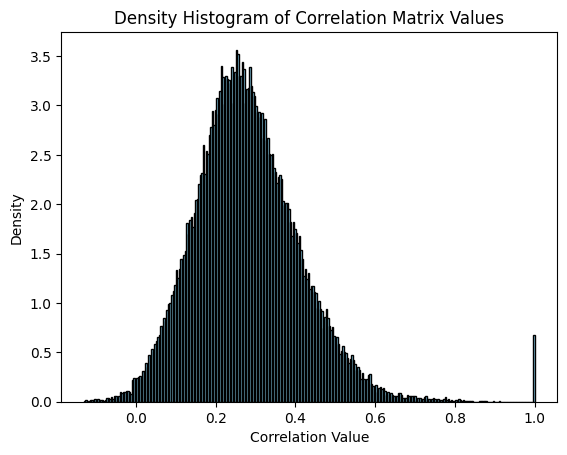

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# データフレーム df が既に与えられているとします

# 株価終値の対数収益率を計算する関数
def calculate_log_returns(df):
    # 欠損値を含む列を削除します
    df = df.dropna(axis=1)

    # 日次の対数収益率を計算します
    log_returns = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    return log_returns

# 対数収益率の計算
log_returns = calculate_log_returns(df)

# 最初のNaNを含む行を削除します
log_returns = log_returns.dropna()

# 対数収益率の標準化
scaler = StandardScaler()
log_returns_standardized = pd.DataFrame(scaler.fit_transform(log_returns), index=log_returns.index, columns=log_returns.columns)

# 標準化された対数収益率の相関行列の計算
correlation_matrix1 = log_returns_standardized.corr()

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix1.values.flatten()

# ヒストグラムのプロット
plt.hist(correlation_values, bins=300, color='skyblue', edgecolor='black', density=True)

# グラフの装飾
plt.title('Density Histogram of Correlation Matrix Values')
plt.xlabel('Correlation Value')
plt.ylabel('Density')

# グラフの表示
plt.show()


In [31]:
import numpy as np
from scipy.stats import skew, kurtosis

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix.to_numpy().flatten()

# 平均の計算
mean_corr = np.mean(correlation_values)

# 分散の計算
var_corr = np.var(correlation_values)

# 歪度の計算
skewness_corr = skew(correlation_values)

# 尖度の計算
kurtosis_corr = kurtosis(correlation_values)

# 結果の表示
print("Mean of correlation values:", mean_corr)
print("Variance of correlation values:", var_corr)
print("Skewness of correlation values:", skewness_corr)
print("Kurtosis of correlation values:", kurtosis_corr)


Mean of correlation values: 0.27899918672667584
Variance of correlation values: 0.015573416359153833
Skewness of correlation values: 0.6277630128229043
Kurtosis of correlation values: 1.9200635193056454


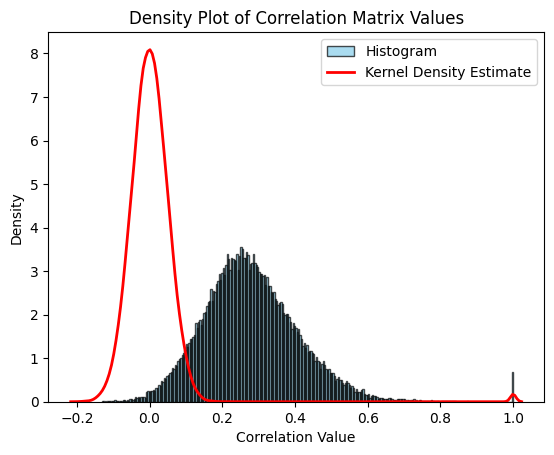

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# データフレーム df が既に与えられているとします

# 株価終値の対数収益率を計算する関数
def calculate_log_returns(df):
    # 欠損値を含む列を削除します
    df = df.dropna(axis=1)

    # 日次の対数収益率を計算します
    log_returns = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
    return log_returns

# 対数収益率の計算
log_returns = calculate_log_returns(df)

# 最初のNaNを含む行を削除します
log_returns = log_returns.dropna()

# 対数収益率の標準化
scaler = StandardScaler()
log_returns_standardized = pd.DataFrame(scaler.fit_transform(log_returns), index=log_returns.index, columns=log_returns.columns)

# 標準化された対数収益率の相関行列の計算
correlation_matrix = log_returns_standardized.corr()

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix.values.flatten()

# ヒストグラムのプロット
plt.hist(correlation_values, bins=300, color='skyblue', edgecolor='black', density=True, alpha=0.7, label='Histogram')

# 大きさ (470×593) の標準正規分布に従う行列を生成
matrix = np.random.randn(423, 300)

# 相関行列の計算
correlation_matrix = np.corrcoef(matrix, rowvar=False)

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix.flatten()

# カーネル密度推定を使用して密度関数を推定し、実線で図示
sns.kdeplot(correlation_values, color='red', linewidth=2, label='Kernel Density Estimate')

# グラフの装飾
plt.title('Density Plot of Correlation Matrix Values')
plt.xlabel('Correlation Value')
plt.ylabel('Density')
plt.legend()

# グラフの表示
plt.show()


In [33]:
import numpy as np
from scipy.stats import skew, kurtosis

# 相関行列の成分を1次元の配列にフラット化
correlation_values = correlation_matrix.flatten()

# 平均の計算
mean_corr = np.mean(correlation_values)

# 分散の計算
var_corr = np.var(correlation_values)

# 歪度の計算
skewness_corr = skew(correlation_values)

# 尖度の計算
kurtosis_corr = kurtosis(correlation_values)

# 結果の表示
print("Mean of correlation values:", mean_corr)
print("Variance of correlation values:", var_corr)
print("Skewness of correlation values:", skewness_corr)
print("Kurtosis of correlation values:", kurtosis_corr)


Mean of correlation values: 0.0032733268841108635
Variance of correlation values: 0.005681883753180615
Skewness of correlation values: 7.6502698941341745
Kurtosis of correlation values: 99.42479159188453
